In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Đọc ảnh đu đủ và dưa hấu
papaya = cv2.imread('dudu.jpg')
watermelon = cv2.imread('duahau.jpg')


In [16]:
def refined_alpha_mask(img):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    lower_white = np.array([0, 0, 180])
    upper_white = np.array([180, 40, 255])
    mask = cv2.inRange(hsv, lower_white, upper_white)
    alpha = cv2.bitwise_not(mask)
    b, g, r = cv2.split(img)
    return cv2.merge([b, g, r, alpha])

papaya_rgba = refined_alpha_mask(papaya)
watermelon_rgba = refined_alpha_mask(watermelon)


In [18]:
def apply_gradient_mask(img, start_color, end_color):
    h, w = img.shape[:2]
    mask = np.linspace(0, 1, w).reshape(1, w, 1)
    mask = np.repeat(mask, h, axis=0)
    gradient = (start_color * (1 - mask) + end_color * mask).astype(np.uint8)
    alpha = img[:, :, 3]
    result = cv2.bitwise_and(gradient, gradient, mask=alpha)
    b, g, r = cv2.split(result)
    return cv2.merge([b, g, r, alpha])


In [19]:
papaya_gradient = apply_gradient_mask(papaya_rgba, np.array([0, 0, 255]), np.array([0, 255, 0]))
watermelon_gradient = apply_gradient_mask(watermelon_rgba, np.array([0, 255, 255]), np.array([128, 0, 128]))


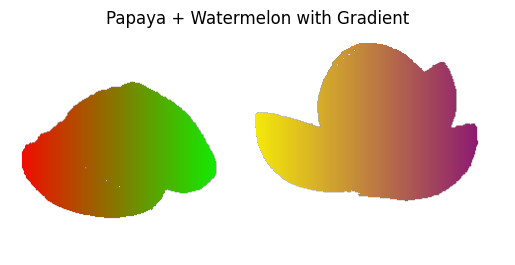

In [23]:
h = max(papaya_gradient.shape[0], watermelon_gradient.shape[0])
w = papaya_gradient.shape[1] + watermelon_gradient.shape[1]
canvas = np.zeros((h, w, 4), dtype=np.uint8)

canvas[:papaya_gradient.shape[0], :papaya_gradient.shape[1]] = papaya_gradient
canvas[:watermelon_gradient.shape[0], papaya_gradient.shape[1]:] = watermelon_gradient

cv2.imwrite('papaya_watermelon_gradient_clean.png', canvas)

plt.imshow(cv2.cvtColor(canvas, cv2.COLOR_BGRA2RGBA))
plt.axis('off')
plt.title("Papaya + Watermelon with Gradient")
plt.show()
